In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from matplotlib import pyplot 
from PIL import Image
from skimage.io import imread, imsave
import io
import numpy as np
import tensorflow as tf
import cv2
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt

from tensorflow.python.ops.numpy_ops import np_config
import timeit

In [211]:
generatorPath = 'generator_51 (2).h5'
imagePath = '512_3_szkic.bmp'

predicted_image_path='predicted_map.png'
original_image_path='destination_test.png'

In [212]:
model = load_model(generatorPath)
np_config.enable_numpy_behavior()

In [213]:
# load an image
def load_image(pixels):
    # load image with the preferred size
    # convert to numpy array
    pixels = img_to_array(pixels)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    # reshape to 1 sample
    pixels = np.expand_dims(pixels, 0)
    return pixels

Created heightmap. Time [s]:  0.5811261999999715


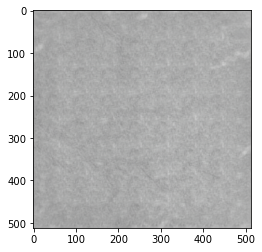

In [214]:
image = Image.open(imagePath)
image = load_image(image)
start = timeit.default_timer()

prediction = model.predict(image)
stop = timeit.default_timer()
print('Created heightmap. Time [s]: ', stop - start)
#gen_image = model.predict(image)
# scale from [-1,1] to [0,1]
prediction = (prediction + 1) / 2.0    
plt.imshow((prediction[0] * 255.0).astype(np.uint8))
#imsave(predicted_image_path, (gen_image[0] * 255.0).astype(np.uint8))
imsave(predicted_image_path, (prediction[0] * 255.0).astype(np.uint8))

In [182]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err


def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    #m = mse(imageA, imageB)
    #s = ssim(imageA, imageB)
    m = 0
    s = 0
    # setup the figure
    fig = pyplot.figure(title)
    pyplot.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    pyplot.imshow(imageA, cmap = pyplot.cm.gray)
    pyplot.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    pyplot.imshow(imageB, cmap = pyplot.cm.gray)
    pyplot.axis("off")
    # show the images
    pyplot.show()

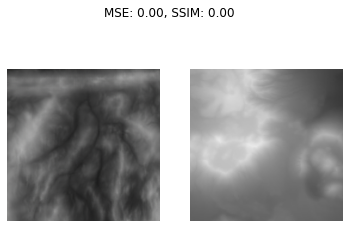

In [7]:
imageA = cv2.imread(predicted_image_path)
imageB = cv2.imread(original_image_path)

#imageA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
#imageB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

compare_images(imageA, imageB, "test")